In [1]:
#!pip install prophet

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from prophet import Prophet




# import files

In [6]:
### import and read csv file

path = 'Output/full_indicators_by_country_by_year.csv'
df = pd.read_csv(path)


df.head(20)

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052,20.0,3.294,7.758981
1,1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,...,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133,20.0,3.294,7.651162
2,2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,...,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184,20.0,3.294,9.694882
3,3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,...,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196,20.0,3.294,9.688910
4,4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,...,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185,20.0,3.294,10.275749
5,5,Afghanistan,AFG,2020,33.8,97.7,58.741548,1.821090,327.0,36.051,...,0.011,0.228321,2.673975,14.384,11.103,12.569,11.710,20.0,3.294,4.236097
6,6,Afghanistan,AFG,2021,34.9,97.7,58.741548,1.821090,327.0,35.842,...,0.011,0.181215,2.673975,9.781,6.754,8.879,11.994,20.0,3.294,21.412279
7,7,Afghanistan,AFG,2022,36.1,85.3,58.741548,1.821090,327.0,35.143,...,0.011,0.182809,2.673975,9.781,6.754,8.879,14.100,20.0,3.294,58.515716
8,8,Afghanistan,AFG,2023,36.1,85.3,58.741548,1.821090,327.0,35.143,...,0.011,0.251628,2.673975,9.781,6.754,8.879,13.991,20.0,3.294,48.679571
9,9,Albania,ALB,2015,76.6,100.0,42.857664,0.656344,1485.0,11.718,...,5.040,10.242016,33.528904,19.276,13.500,20.502,17.193,37.0,1.809,19.613268


## Inspect the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 53 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   index                                                                                                 1663 non-null   int64  
 1   country                                                                                               1663 non-null   object 
 2   iso3Code                                                                                              1663 non-null   object 
 3   year                                                                                                  1663 non-null   int64  
 4   clean fuels for cooking (% of population)                                                             

In [8]:
df.describe()

,index,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,...,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000
mean,831.000000,2019.034275,65.258328,83.683824,38.149248,1.140878,1080.260313,19.438815,23.912632,315.239622,...,5.118244,3.461613,9.987065,5.576078,6.920728,6.748378,7.088161,40.164161,1.853091,11.171426
std,480.211065,2.589557,39.562522,27.096966,22.524579,1.549332,803.647910,10.131943,39.928103,1857.934281,...,4.046082,5.889656,13.997079,5.854945,7.703278,6.619296,5.775616,21.050826,0.886108,34.368195
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.500000,2017.000000,25.600000,73.750000,19.602978,0.336253,460.000000,10.800000,0.000000,112.430438,...,1.420000,0.000000,0.000000,1.293000,0.480500,1.236500,3.272000,25.000000,1.564000,0.721311
50%,831.000000,2019.000000,87.500000,99.900000,39.434768,0.682330,900.000000,16.833000,0.000000,127.508994,...,4.380000,1.263797,5.002966,4.040000,4.631000,5.490000,5.255000,37.000000,2.028000,2.396329
75%,1246.500000,2021.000000,100.000000,100.000000,54.637271,1.342953,1622.000000,27.179000,44.000660,159.761076,...,8.315000,4.665517,14.570040,7.716000,10.420000,9.767500,9.498500,54.000000,2.332000,7.089806
max,1662.000000,2023.000000,100.000000,100.000000,84.563658,14.208087,3240.000000,46.558000,249.411354,38796.557297,...,16.990000,88.963244,127.580662,33.291000,46.530000,38.182000,34.007000,90.000000,3.397000,448.765894


In [9]:
df.columns

Index(['index', 'country', 'iso3Code', 'year',
       'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government 

### Drop the non feature columns

In [10]:
df_Xy = df.drop(columns=['index', 'country','iso3Code'])

### correlation matrix to assess relationships

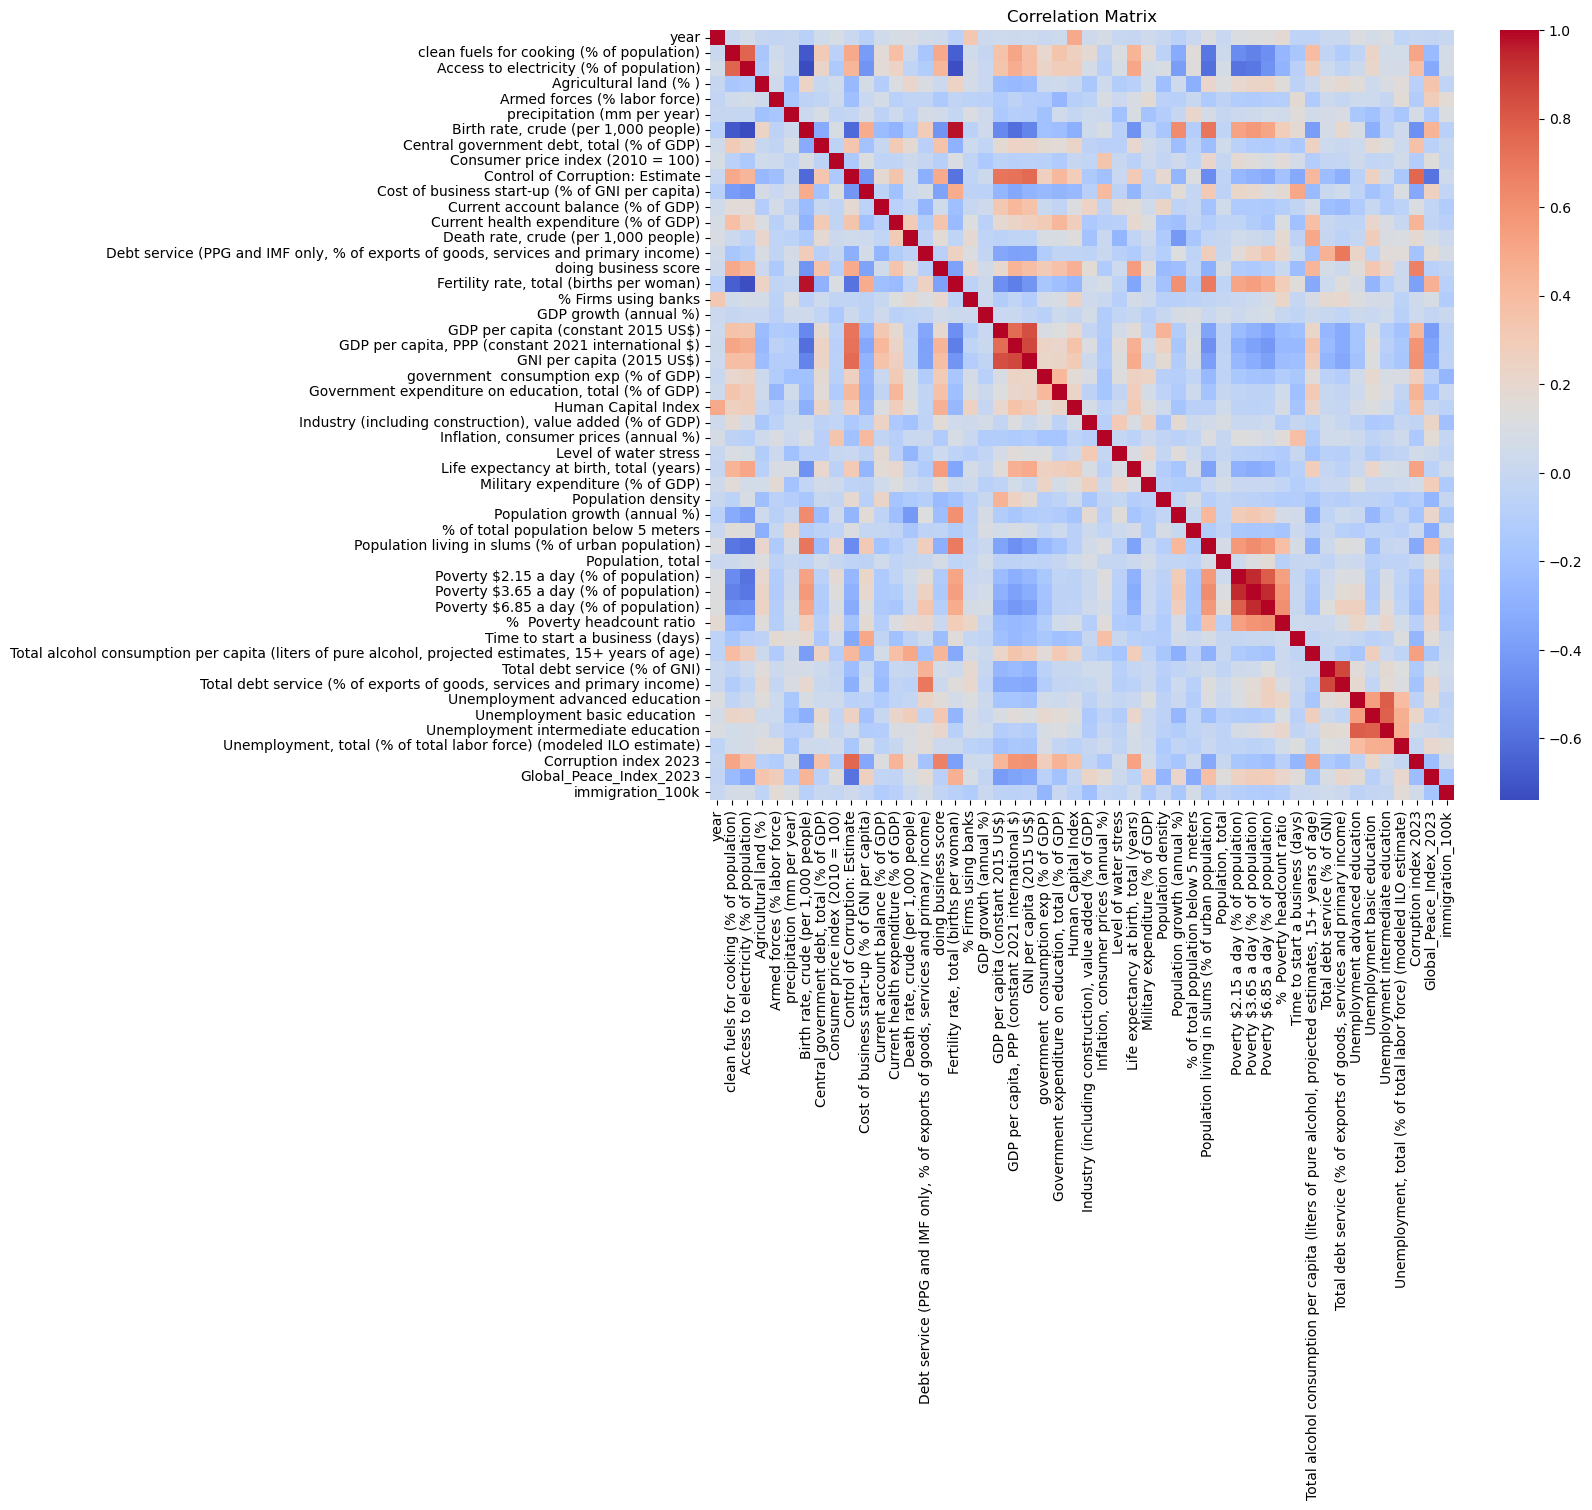

In [11]:
# Plot correlation matrix to assess relationships
plt.figure(figsize=(12,10))
corr_matrix = df_Xy.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

### Normalize the indicator columns

In [16]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

indicators_scaled = StandardScaler().fit_transform(df_Xy[[

                                                                      'clean fuels for cooking (% of population)',
                                                                      'Access to electricity (% of population)', 'Agricultural land (% )',
                                                                      'Armed forces (% labor force)', 'precipitation (mm per year)',
                                                                      'Birth rate, crude (per 1,000 people)',
                                                                      'Central government debt, total (% of GDP)',
                                                                      'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
                                                                      'Cost of business start-up (% of GNI per capita)',
                                                                      'Current account balance (% of GDP)',
                                                                      'Current health expenditure (% of GDP)',
                                                                      'Death rate, crude (per 1,000 people)',
                                                                      'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
                                                                      'doing business score', 'Fertility rate, total (births per woman)',
                                                                      '% Firms using banks', 'GDP growth (annual %)',
                                                                      'GDP per capita (constant 2015 US$)',
                                                                      'GDP per capita, PPP (constant 2021 international $)',
                                                                      'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
                                                                      'Government expenditure on education, total (% of GDP)',
                                                                      'Human Capital Index',
                                                                      'Industry (including construction), value added (% of GDP)',
                                                                      'Inflation, consumer prices (annual %)', 'Level of water stress',
                                                                      'Life expectancy at birth, total (years)',
                                                                      'Military expenditure (% of GDP)', 'Population density',
                                                                      'Population growth (annual %)', '% of total population below 5 meters',
                                                                      'Population living in slums (% of urban population)',
                                                                      'Population, total', 'Poverty $2.15 a day (% of population)',
                                                                      'Poverty $3.65 a day (% of population)',
                                                                      'Poverty $6.85 a day (% of population)', '%  Poverty headcount ratio ',
                                                                      'Time to start a business (days)',
                                                                      'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                                                                      'Total debt service (% of GNI)',
                                                                      'Total debt service (% of exports of goods, services and primary income)',
                                                                      'Unemployment advanced education', 'Unemployment basic education ',
                                                                      'Unemployment intermediate education',
                                                                      'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                                                                      'Corruption index 2023', 'Global_Peace_Index_2023', 'immigration_100k'
    

                                                                      
                                                                      ]])

In [17]:
# Create a DataFrame with the scaled data
indicators_scaled_df = pd.DataFrame(indicators_scaled, columns=[
                                                               
                                                               'clean fuels for cooking (% of population)',
                                                               'Access to electricity (% of population)', 'Agricultural land (% )',
                                                               'Armed forces (% labor force)', 'precipitation (mm per year)',
                                                               'Birth rate, crude (per 1,000 people)',
                                                               'Central government debt, total (% of GDP)',
                                                               'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
                                                               'Cost of business start-up (% of GNI per capita)',
                                                               'Current account balance (% of GDP)',
                                                               'Current health expenditure (% of GDP)',
                                                               'Death rate, crude (per 1,000 people)',
                                                               'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
                                                               'doing business score', 'Fertility rate, total (births per woman)',
                                                               '% Firms using banks', 'GDP growth (annual %)',
                                                               'GDP per capita (constant 2015 US$)',
                                                               'GDP per capita, PPP (constant 2021 international $)',
                                                               'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
                                                               'Government expenditure on education, total (% of GDP)',
                                                               'Human Capital Index',
                                                               'Industry (including construction), value added (% of GDP)',
                                                               'Inflation, consumer prices (annual %)', 'Level of water stress',
                                                               'Life expectancy at birth, total (years)',
                                                               'Military expenditure (% of GDP)', 'Population density',
                                                               'Population growth (annual %)', '% of total population below 5 meters',
                                                               'Population living in slums (% of urban population)',
                                                               'Population, total', 'Poverty $2.15 a day (% of population)',
                                                               'Poverty $3.65 a day (% of population)',
                                                               'Poverty $6.85 a day (% of population)', '%  Poverty headcount ratio ',
                                                               'Time to start a business (days)',
                                                               'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                                                               'Total debt service (% of GNI)',
                                                               'Total debt service (% of exports of goods, services and primary income)',
                                                               'Unemployment advanced education', 'Unemployment basic education ',
                                                               'Unemployment intermediate education',
                                                               'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                                                               'Corruption index 2023', 'Global_Peace_Index_2023', 'immigration_100k'
                                                        
                                                               ])

In [18]:
# Define the target and predictors.
# We remove columns that are identifiers or not used for prediction.
non_predictors = ['index', 'country', 'iso3Code']
target = 'immigration_100k'
predictors = [col for col in indicators_scaled_df.columns if col not in non_predictors + [target]]

# Select features and target
X = df[predictors]
y = df[target]

## Splitting the data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(1330, 48)

In [23]:
X_test.shape

(333, 48)

## Regression Modelling

### --- Linear Regression ---

In [24]:
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 582.9613246053755
Linear Regression R2: 0.43432875824206685


### --- Random Forest Regression ---

In [25]:
# --- Random Forest Regression ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)
print("Random Forest Regression R2:", r2_rf)

Random Forest Regression MSE: 137.82418833268767
Random Forest Regression R2: 0.8662635470522743


The results show that the Random Forest model significantly outperforms the Linear Regression model:

- Mean Squared Error (MSE):

  - Linear Regression: 575.06
  - Random Forest: 134.99
   A lower MSE indicates that the Random Forest model's predictions are, on average, much closer to the actual values.

- R² Score:

  - Linear Regression: 0.442 (approximately 44% of the variance explained)
  - Random Forest: 0.869 (approximately 87% of the variance explained)
   The higher R² score of the Random Forest model means it captures a significantly larger proportion of the variability in immigration_100k.
   
In summary, the Random Forest model is more accurate and reliable for predicting immigration per 100k, likely due to its ability to capture non-linear relationships and interactions among the predictors that a simple linear model might miss.

## Feature Importance & Key Variable Analysis

In [26]:
# Use Random Forest to gauge feature importance
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 Unemployment, total (% of total labor force) (modeled ILO estimate)                                     0.389009
Armed forces (% labor force)                                                                            0.128580
government  consumption exp (% of GDP)                                                                  0.076507
Population, total                                                                                       0.070907
Population density                                                                                      0.040376
Total debt service (% of GNI)                                                                           0.020264
Debt service (PPG and IMF only, % of exports of goods, services and primary income)                     0.019215
Level of water stress                                                                                   0.017880
Fertility rate, total (births per woman)                                  

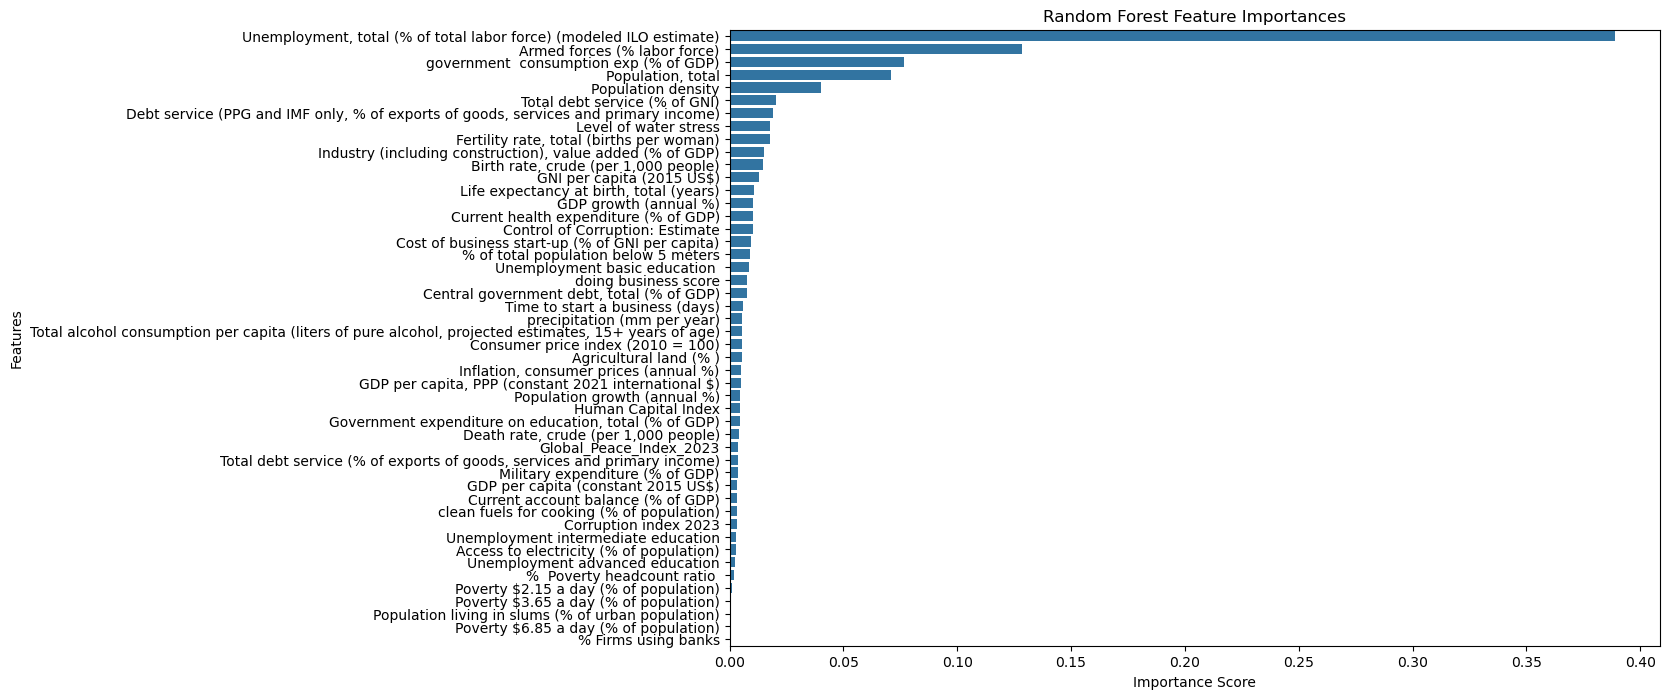

In [27]:
# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [28]:
# Unemployment, total (% of total labor force) (modeled ILO estimate)         
# Armed forces (% labor force)                                           
# government  consumption exp (% of GDP)                                
# Population, total                                                       
# Population density                                                      
# Total debt service (% of GNI)                                            

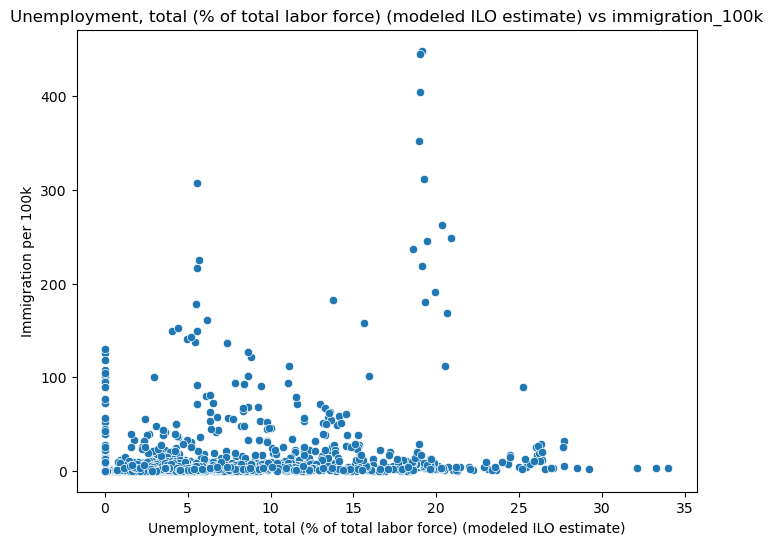

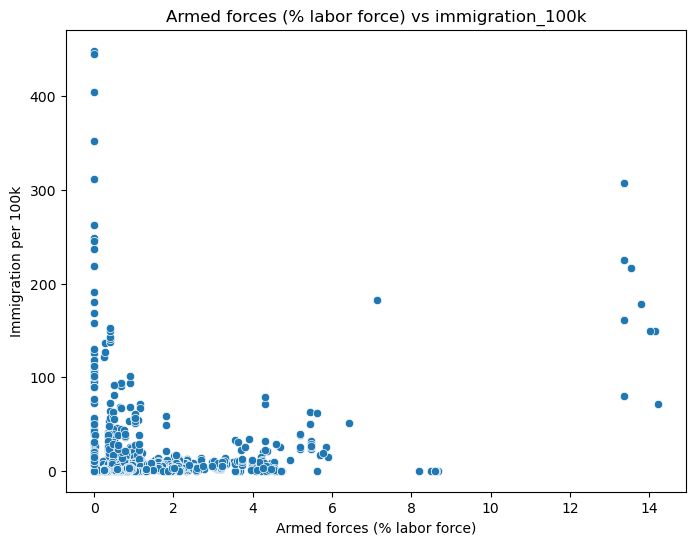

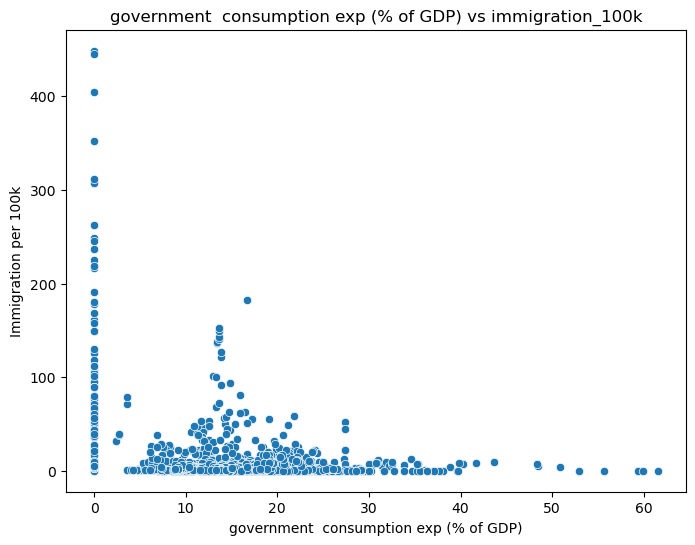

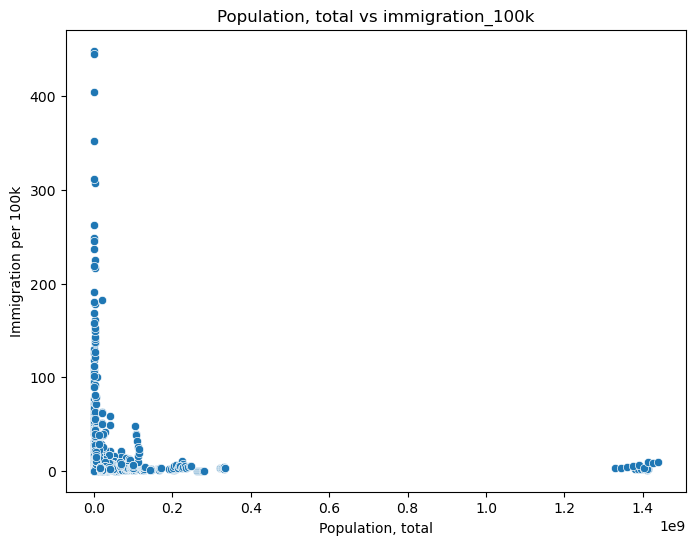

In [29]:
# Investigate specific features:
key_features = ['Unemployment, total (% of total labor force) (modeled ILO estimate)','Armed forces (% labor force)', 'government  consumption exp (% of GDP)', 'Population, total']

for feature in key_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel("Immigration per 100k")
    plt.show()

### Using GridSearchCV to tune the RandomForestRegressor

In [30]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to perform 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search on the training data (assume X_train, y_train are defined)
grid_search.fit(X_train, y_train)

# Output the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Use the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate the performance of the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print("Tuned Random Forest Regression MSE:", mse_best)
print("Tuned Random Forest Regression R2:", r2_best)

Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Regression MSE: 132.1963128788425
Tuned Random Forest Regression R2: 0.8717245050302167


Random Forest Regression MSE: 134.9869736634401
Random Forest Regression R2: 0.8690166126114236

### using the XGBoost method (XGBRegressor)

In [31]:
# Initialize the XGBRegressor.
# The 'objective' is set to 'reg:squarederror' for regression tasks.
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data.
xgb_reg.fit(X_train, y_train)

# Predict on the test set.
y_pred = xgb_reg.predict(X_test)

# Evaluate the model performance.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression MSE:", mse)
print("XGBoost Regression R2:", r2)

XGBoost Regression MSE: 177.45741066584026
XGBoost Regression R2: 0.8278058086984665


The tuned Random Forest model has a lower MSE (125.43 vs. 142.89) and a higher R² (0.878 vs. 0.861) compared to the XGBoost model. This indicates that the Random Forest model is slightly more accurate in its predictions and explains a greater proportion of the variance in immigration_100k. In practical terms, the tuned Random Forest reduces prediction error and provides better overall performance on this dataset than the XGBoost model.

### Using GridSearchCV to tune the hyperparameters of an XGBoost regressor. 

This tuning process explores a range of parameters and selects the best configuration based on cross-validated performance (using negative mean squared error as the metric). Once the optimal parameters are identified, the model's performance is evaluated on the test set.

In [18]:
# Define a parameter grid for XGBoost tuning.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBRegressor.
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with 5-fold cross-validation.
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # We use negative MSE as the scoring metric.
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV on the training data.
grid_search.fit(X_train, y_train)

# Output the best parameters found.
print("Best parameters found:", grid_search.best_params_)

# Use the best estimator from the grid search.
best_xgb = grid_search.best_estimator_

# Predict on the test set.
y_pred = best_xgb.predict(X_test)

# Evaluate the performance.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned XGBoost Regression MSE:", mse)
print("Tuned XGBoost Regression R2:", r2)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Tuned XGBoost Regression MSE: 165.3037848114507
Tuned XGBoost Regression R2: 0.8395989694773016



Despite the tuning process identifying a parameter set via cross-validation, the tuned model ended up with slightly higher error and lower explanatory power on the test set. This could mean that:

- The default hyperparameters were already well-suited for your dataset.
- The search space in the tuning process might not have included parameter combinations that improve performance.
- There might be slight overfitting to the training folds during tuning, resulting in a model that generalizes a bit less well.

Thus, in this instance, the default XGBoost model outperformed the tuned version on the test data.


### Time Series Forecasting

             ds          y
994  2015-01-01  56.220746
995  2016-01-01  43.917018
996  2017-01-01  57.317373
997  2018-01-01  44.643668
998  2019-01-01  62.796953
999  2020-01-01  33.174989
1000 2021-01-01  54.882835
1001 2022-01-01  81.186640
1002 2023-01-01  91.194497


13:28:28 - cmdstanpy - INFO - Chain [1] start processing
13:28:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


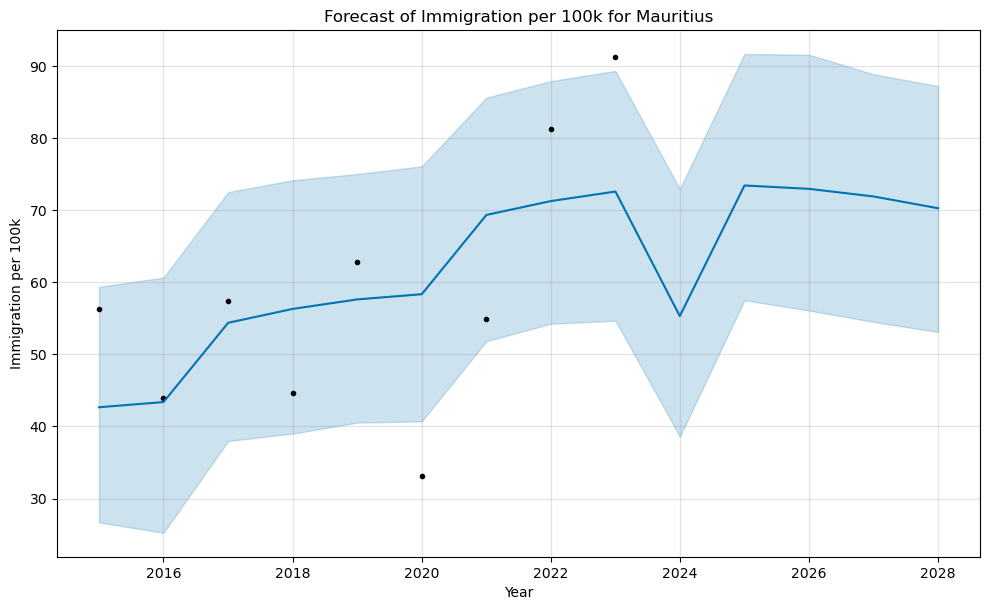

In [19]:
# Choose a country to forecast (e.g., "Afghanistan")
country_name = "Mauritius"

# Filter the data for the chosen country and sort by year
df_country = df[df['country'] == country_name].copy()
df_country = df_country.sort_values('year')

# Prophet requires the following column names: 
# 'ds' for the datetime and 'y' for the target variable.
df_country['ds'] = pd.to_datetime(df_country['year'].astype(str), format='%Y')
df_country['y'] = df_country['immigration_100k']

# Display the prepared data
print(df_country[['ds', 'y']])

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_country[['ds', 'y']])

# Create a dataframe to hold predictions for the next 5 years
future = model.make_future_dataframe(periods=5, freq='Y')

# Forecast future immigration levels
forecast = model.predict(future)

# Plot the forecasted immigration_100k
fig = model.plot(forecast)
plt.title(f"Forecast of Immigration per 100k for {country_name}")
plt.xlabel("Year")
plt.ylabel("Immigration per 100k")
plt.show()

# (Optional) To see the forecast components (trend, yearly seasonality, etc.)
#fig2 = model.plot_components(forecast)
#plt.show()